<a href="https://colab.research.google.com/github/sweta78/EIP4/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


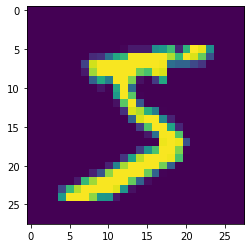

In [34]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

(60000, 28, 28)


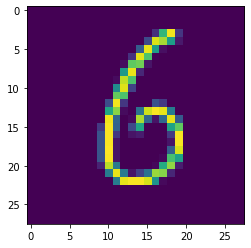

In [36]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[18])

(60000, 28, 28)


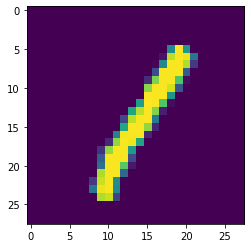

In [37]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[23])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [39]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [41]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
Y_train = np_utils.to_categorical(y_train, 64)
Y_test = np_utils.to_categorical(y_test, 64)

In [84]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

from keras.layers import Activation
from keras.layers import Convolution2D, MaxPooling2D
model = Sequential()

 
model.add(Convolution2D(32, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))
model.add(Convolution2D(32, 3, activation='relu'))

model.add(MaxPooling2D())

model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))
model.add(Convolution2D(64, 3, activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 22, 22, 32)        9248      
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 20, 20, 32)        9248      
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 18, 18, 32)        9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 7, 7, 64)        

In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [86]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 30s 503us/step - loss: 0.6216 - acc: 0.8524
Epoch 2/10
60000/60000 [==============================] - 28s 467us/step - loss: 0.0601 - acc: 0.9825
Epoch 3/10
60000/60000 [==============================] - 28s 469us/step - loss: 0.0433 - acc: 0.9869
Epoch 4/10
60000/60000 [==============================] - 28s 470us/step - loss: 0.0337 - acc: 0.9897
Epoch 5/10
60000/60000 [==============================] - 28s 471us/step - loss: 0.0286 - acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 28s 468us/step - loss: 0.0229 - acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 28s 464us/step - loss: 0.0203 - acc: 0.9940
Epoch 8/10
60000/60000 [==============================] - 28s 464us/step - loss: 0.0185 - acc: 0.9940
Epoch 9/10
60000/60000 [==============================] - 28s 460us/step - loss: 0.0153 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 28s 460us/step - loss: 

In [87]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.026483835436636037, 0.9927]
